# The Sparks Foundation
GRIP(Graduate Rotational Internship Program April-2024)

NAME : AKSHAY KUMAR SINGH

Domain : Data Science and Business Analytics

Task 2 :Prediction using Unsupervised ML

# Problem Statement :
Predict the optimum number of clusters and represent it visually.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset

In [114]:
iris = pd.read_csv(r"C:\Users\msian\Downloads\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Dropping the Unncessary Column

In [115]:
iris.drop(labels= "Id" ,axis=1 ,inplace=True)

# Checking the info of dataset

In [116]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


checking the info of the data set which shows the total Entries , all Data types as well.

# Checking the Null Values

In [117]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So we find that there is not any null values.

# Descriptive Statistics

In [118]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Average Length of Sepal is : <b>5.84.

Average Width of Sepal is : <b>3.05.

Average Length of Petal is : <b>3.75.

Average Width of Petal is : <b>1.19.

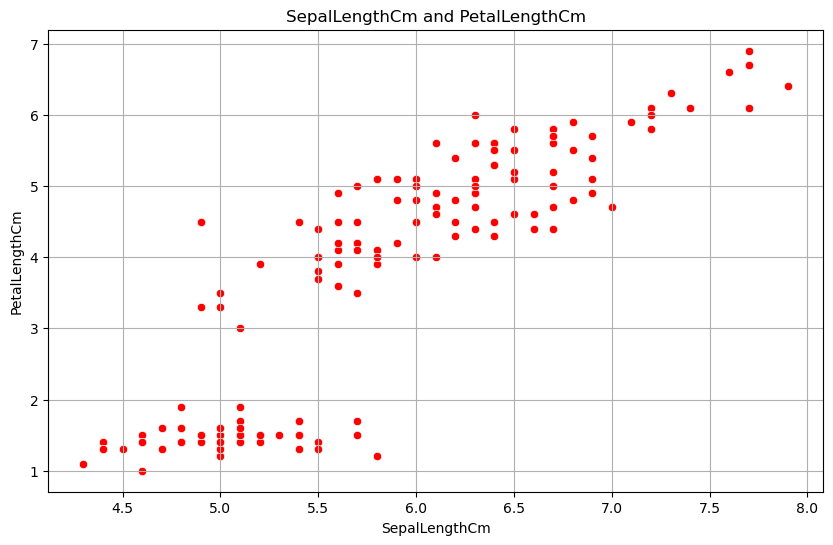

In [130]:
#Plotting the Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=iris , x="SepalLengthCm" , y="PetalLengthCm",color="red")
plt.title("SepalLengthCm and PetalLengthCm")
plt.grid()
plt.show()

The range of values for both SepalLengthCm (approximately 4.5 to 7.5) and PetalLengthCm (approximately 1.0 to 6.5).

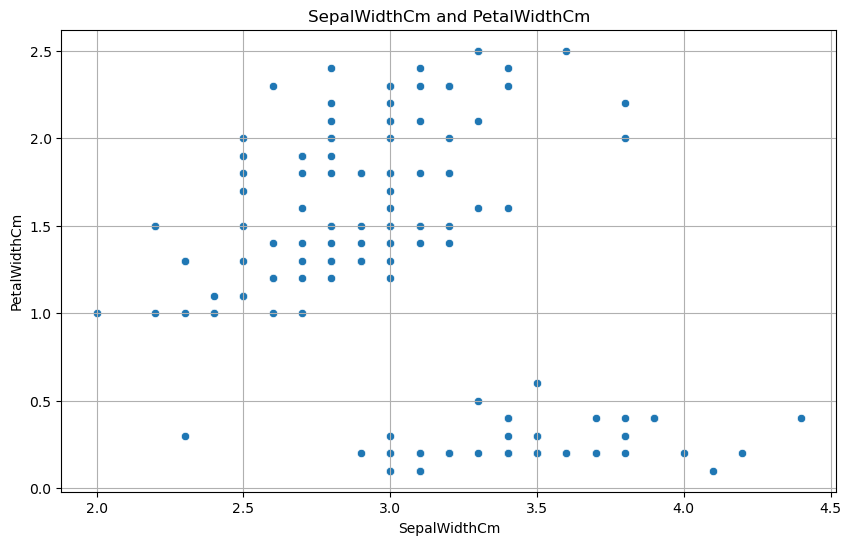

In [131]:
#Plotting the Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=iris , x="SepalWidthCm" , y="PetalWidthCm")
plt.title("SepalWidthCm and PetalWidthCm")
plt.grid()
plt.show()

The range of values for both SepalWidthCm (approximately 2.0 to 4.5) and PetalWidthCm (approximately 0.5 to 2.5).

# For checking Correlation We need to create HeatMap

In [111]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


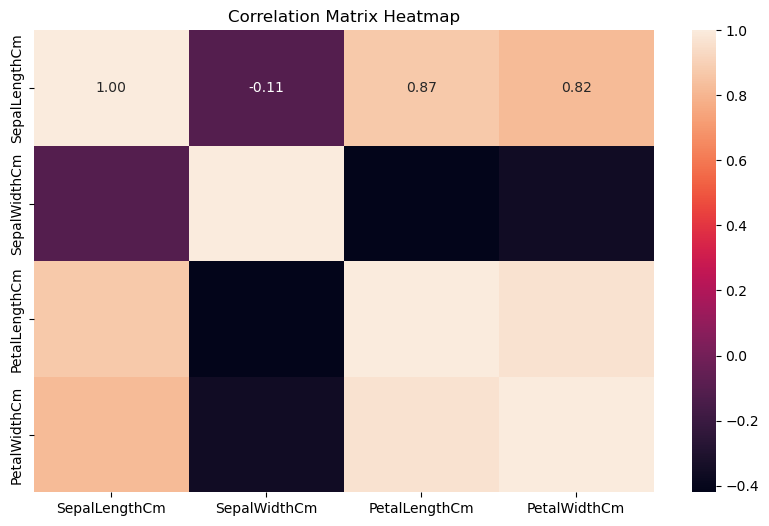

In [112]:
#heeatmap
plt.figure(figsize=(10, 6))
sns.heatmap(iris.corr(), annot=True,fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


 strong positive correlation between Petal Length (cm) and Sepal Length (cm)

# We have to find the optimum value/clusters for K Means? 

In [133]:
# Finding the optimum number of clusters for k-meanss
X = iris.iloc[:, 0:4].values
# Calculating the WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

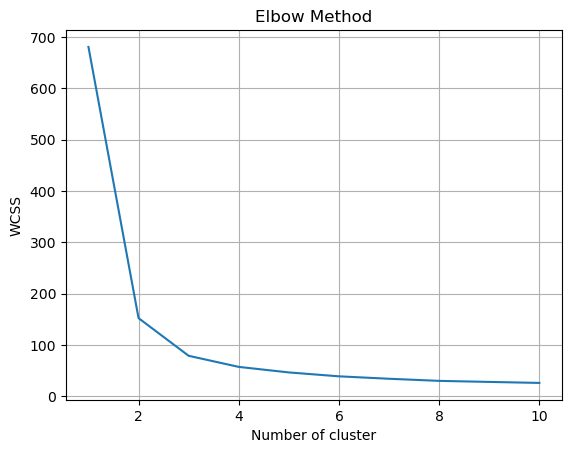

In [134]:
# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

From this we choose the number of clusters as <b>3.

In [141]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmean = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
kmean_y = kmean.fit_predict(X)

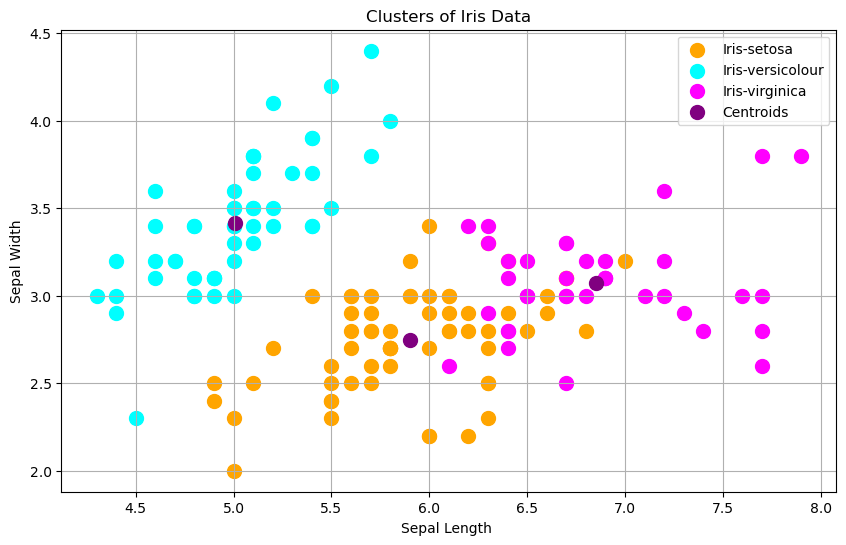

In [140]:
# Visualising the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[kmean_y == 0, 0], X[kmean_y == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[kmean_y == 1, 0], X[kmean_y == 1, 1], s = 100, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(X[kmean_y == 2, 0], X[kmean_y == 2, 1],s = 100, c = 'magenta', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], s = 100, c = 'purple', label = 'Centroids')
plt.title('Clusters of Iris Data')
plt.xlabel('Sepal Length ')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid()
plt.show()

# Conclusion:
 

The number of clusters is = <b>3